## Predict churning probability of a credit card customer

In [27]:
# imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import seaborn as sns
plt.style.use('ggplot') # default plot style.

from scipy import stats
from scipy.stats import norm
from pandas_profiling import ProfileReport

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer 
from sklearn.metrics import classification_report
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import RobustScaler

import math
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('BankChurners.csv')

display(df.shape)
# display 5 sample randomly
df.sample(5)

(10127, 23)

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
271,717806133,Existing Customer,40,M,2,Uneducated,Divorced,$60K - $80K,Blue,29,...,23603.0,0,23603.0,0.795,1382,31,1.067,0.000,0.000068,0.99993
133,713356833,Existing Customer,52,M,1,Graduate,Married,$80K - $120K,Blue,43,...,3710.0,2517,1193.0,1.541,1578,34,0.700,0.678,0.000148,0.99985
8968,780114558,Existing Customer,50,M,1,High School,Married,Less than $40K,Blue,35,...,3968.0,2264,1704.0,1.098,12535,118,0.815,0.571,0.000085,0.99992
1322,787489083,Existing Customer,55,M,4,Post-Graduate,Married,$80K - $120K,Blue,43,...,21351.0,2517,18834.0,0.818,1887,32,0.882,0.118,0.000403,0.99960
9600,709013208,Existing Customer,40,M,2,Uneducated,Single,$80K - $120K,Blue,36,...,15594.0,1690,13904.0,0.690,16101,127,0.608,0.108,0.000071,0.99993


In [4]:
# removing some columns
col_drop = ['CLIENTNUM',
            'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
           'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2']
df = df.drop(columns = col_drop)
df.shape

(10127, 20)

## Checking data statistics and data types

In [5]:
# Checking if there are any missing values
df.isna().sum()

Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

In [6]:
# Checking features and target columns
display(df.columns)
# Checking dtypes
display(df.info())
# Checking numeric values stats
display(df.describe())

Index(['Attrition_Flag', 'Customer_Age', 'Gender', 'Dependent_count',
       'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category',
       'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'],
      dtype='object')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition_Flag            10127 non-null  object 
 1   Customer_Age              10127 non-null  int64  
 2   Gender                    10127 non-null  object 
 3   Dependent_count           10127 non-null  int64  
 4   Education_Level           10127 non-null  object 
 5   Marital_Status            10127 non-null  object 
 6   Income_Category           10127 non-null  object 
 7   Card_Category             10127 non-null  object 
 8   Months_on_book            10127 non-null  int64  
 9   Total_Relationship_Count  10127 non-null  int64  
 10  Months_Inactive_12_mon    10127 non-null  int64  
 11  Contacts_Count_12_mon     10127 non-null  int64  
 12  Credit_Limit              10127 non-null  float64
 13  Total_Revolving_Bal       10127 non-null  int64  
 14  Avg_Op

None

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894
std,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691
min,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000
50%,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000
75%,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000
max,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000


### Exploration

1. Attrition_Flag (1: Existing Customer, 0: Attrited Customer): The Customer leave or not
1. Gender (1: Male, 0: Female)
1. Education_Level (Graduate , High School, Unknown, Uneducated, College, Post-Graduate, Doctorate)
1. Marital_Status (Married, Single, Unknown, Divorced)
1. Income_Categories (Less than 40K, 40K - 60K, 80K - 120K, 60K - 80K, Unknown, 120K +) in dollar
1. Card_Categories (Blue, Silver, Gold, Platinum)

In [7]:
cat_columns = ['Attrition_Flag', 'Gender', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category']

def pltCountplot(cats):
    """
    Count plot for all cateforical variables
    """
    fig, axis = plt.subplots(len(cats) // 3,3, figsize=(20,12))  

    index = 0
    for i in range(len(cats) // 3):
        for j in range(3):
            
            ax = sns.countplot(cats[index], data=df, ax=axis[i][j])
            
            if cats[index] in ['Education_Level', 'Income_Category']:
                for item in ax.get_xticklabels():
                    item.set_rotation(15)
                
            for p in ax.patches:
                height = p.get_height()
                ax.text(p.get_x()+p.get_width()/2.,
                        height + 3,
                        '{:1.2f}%'.format(height/len(df)*100),
                        ha="center") 
            index += 1

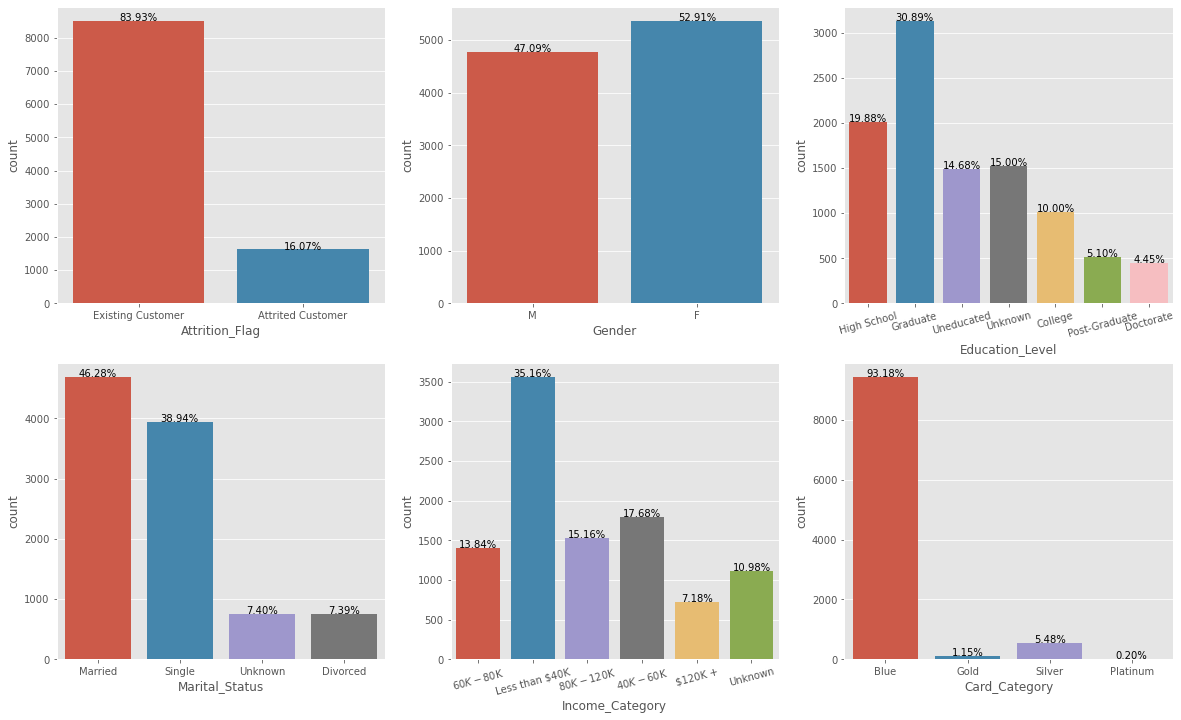

In [8]:
pltCountplot(cat_columns)

### Observation
1. Data is imbalanced in the favor of exiting customers.
1. Card cateogory is overwhelmingly Blue. (correlated with income category)

In [9]:
def pltCountplotHueTarget(cats, target):
    """
    Further categorize categorical variables using Attrition_Flag 
    """
    fig, axis = plt.subplots(len(cats) // 3,3, figsize=(20,12))  

    index = 0
    for i in range(len(cats) // 3):
        for j in range(3):
            
            ax = sns.countplot(cats[index], data=df, hue=target, ax=axis[i][j])
            
            ax.legend(title='Customer exit?',
                      loc='upper right',
                      labels=['Yes', 'No'])
            
            if cats[index] in ['Education_Level', 'Income_Category']:
                for item in ax.get_xticklabels():
                    item.set_rotation(15)
                
            for p in ax.patches:
                height = p.get_height()
                ax.text(p.get_x()+p.get_width()/2.,
                        height + 3,
                        '{:1.2f}%'.format(height/len(df)*100),
                        ha="center") 
            index += 1


posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


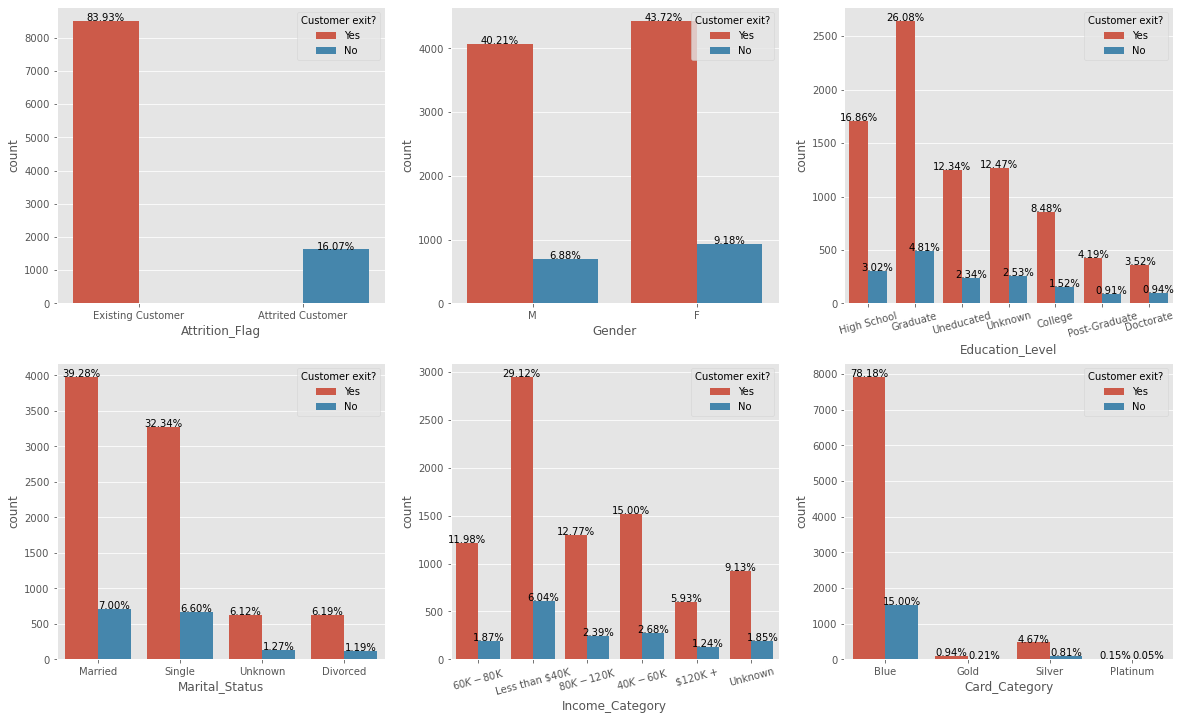

In [10]:
pltCountplotHueTarget(cat_columns, 'Attrition_Flag')

### Observation
1. Most of 'Blue' card category holders are exiting.
1. Income is less than 40K and unkown income exiting.

### Numerical Features
* Customer_Age: Customer's Age in Years
* Dependent_count: Number of dependents
* Months_on_book: Period of relationship with bank
* Total_Relationship_Count: Total no. of products held by the customer
* Months_Inactive_12_mon: No. of months inactive in the last 12 months
* Contacts_Count_12_mon: No. of Contacts in the last 12 months
* Credit_Limit: Credit Limit on the Credit Card
* Total_Revolving_Bal: Total Revolving Balance on the Credit Card
* Avg_Open_To_Buy: Open to Buy Credit Line (Average of last 12 months)
* Total_Amt_Chng_Q4_Q1: Change in Transaction Amount (Q4 over Q1)
* Total_Trans_Amt: Total Transaction Amount (Last 12 months)
* Total_Trans_Ct: Total Transaction Count (Last 12 months)
* Total_Ct_Chng_Q4_Q1: Change in Transaction Count (Q4 over Q1)
* Avg_Utilization_Ratio: Average Card Utilization Ratio

In [11]:
num_columns = ['Customer_Age','Credit_Limit','Months_on_book','Avg_Utilization_Ratio','Avg_Open_To_Buy','Total_Trans_Amt','Dependent_count',
                  'Total_Relationship_Count','Months_Inactive_12_mon','Contacts_Count_12_mon','Total_Revolving_Bal',
                  'Total_Amt_Chng_Q4_Q1','Total_Trans_Ct','Total_Ct_Chng_Q4_Q1']

few_columns = ['Customer_Age','Credit_Limit','Months_on_book','Avg_Utilization_Ratio','Avg_Open_To_Buy','Total_Trans_Amt']


def plotDistPlot(columns):
    fig, ax = plt.subplots(len(columns)//3, 3,figsize=(20, 12))
    
    index = 0
    for i in range(2):
        for j in range(3):
            sns.distplot(df.loc[:, columns[index]],
                         hist=True,
                         fit=norm,
                         kde=True,
                         ax=ax[i][j])
            ax[i][j].set_title(columns[index])
            ax[i][j].legend(labels=['Normal', 'Actual'])
            index += 1


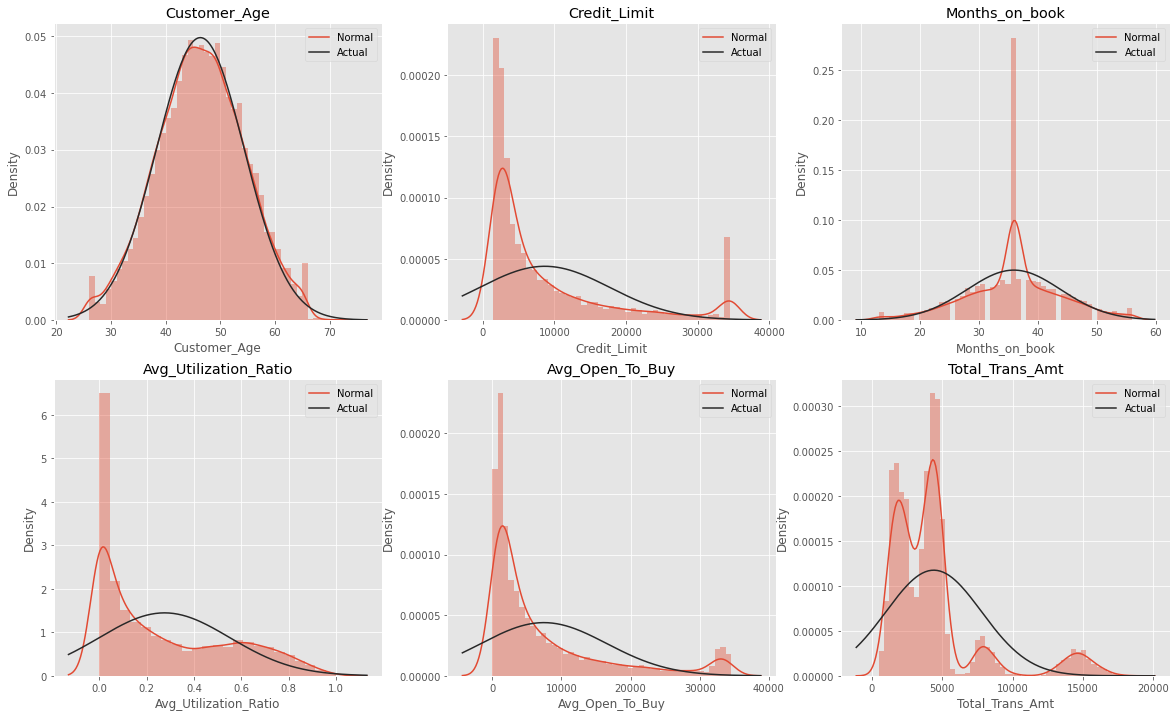

In [12]:
plotDistPlot(few_columns)

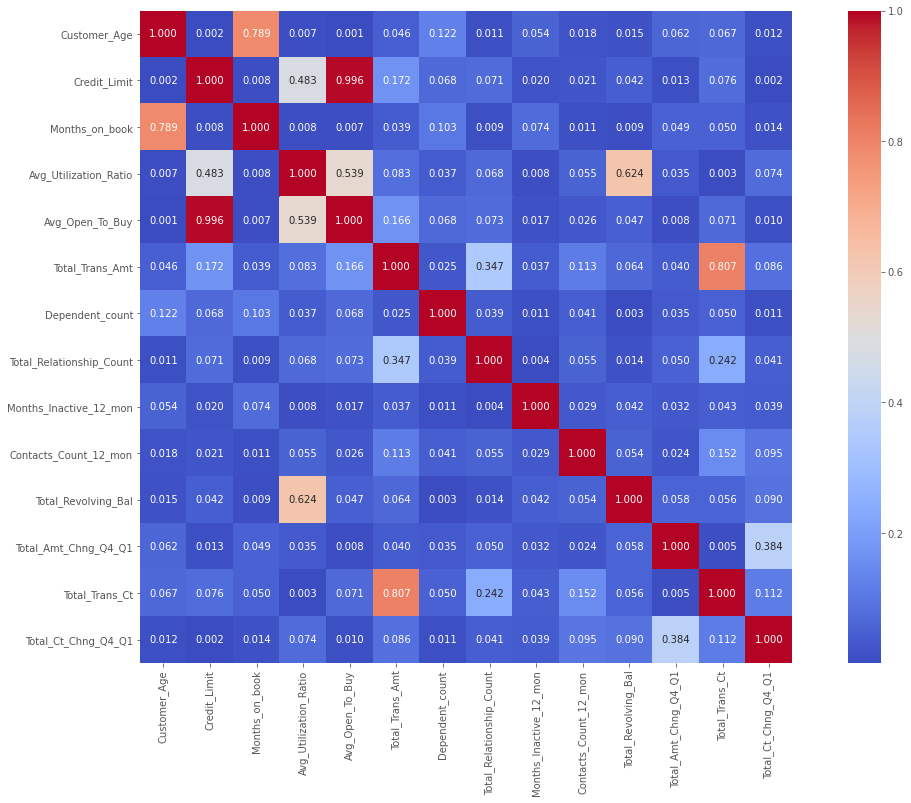

In [13]:
corr_data = df.loc[:, num_columns].corr()

plt.figure(figsize=(20,12))
sns.heatmap(corr_data.abs(), annot=True, fmt='.3f',cmap='coolwarm',square=True)
plt.show()

### Making data ready for machine learning
1. Label encoding to categorical data.
1. Scaling for numerical features

In [14]:
X = df.drop(columns=['Attrition_Flag'])
y = df['Attrition_Flag']

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42,stratify=y)

In [16]:
from sklearn.pipeline import Pipeline
num_feat = ['Customer_Age','Credit_Limit','Months_on_book','Avg_Utilization_Ratio','Avg_Open_To_Buy','Total_Trans_Amt','Dependent_count',
                  'Total_Relationship_Count','Months_Inactive_12_mon','Contacts_Count_12_mon','Total_Revolving_Bal',
                  'Total_Amt_Chng_Q4_Q1','Total_Trans_Ct','Total_Ct_Chng_Q4_Q1']
cat_feat = ['Gender', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category']

In [28]:
numeric_transformer = Pipeline(steps=[('Standard scalar', RobustScaler())])
categorical_transformer = Pipeline(steps=[('onehot', OrdinalEncoder())])

In [29]:
col_transformer = ColumnTransformer(transformers=[
    ('numeric_preprocess',numeric_transformer,num_feat),
    ('categorical_preprocess',categorical_transformer,cat_feat)]
                                    ,remainder='drop', n_jobs=-1)

In [30]:
from sklearn.ensemble import RandomForestClassifier

In [31]:
pipeline_rf = Pipeline([
    ('preprocess_columns',col_transformer),
    ('random_forest_classifier', RandomForestClassifier(criterion='entropy', random_state=0, n_jobs=-1))
])

In [32]:
pipeline_rf.fit(X_train,y_train)

Pipeline(steps=[('preprocess_columns',
                 ColumnTransformer(n_jobs=-1,
                                   transformers=[('numeric_preprocess',
                                                  Pipeline(steps=[('Standard '
                                                                   'scalar',
                                                                   RobustScaler())]),
                                                  ['Customer_Age',
                                                   'Credit_Limit',
                                                   'Months_on_book',
                                                   'Avg_Utilization_Ratio',
                                                   'Avg_Open_To_Buy',
                                                   'Total_Trans_Amt',
                                                   'Dependent_count',
                                                   'Total_Relationship_Count',
                                 

In [33]:
print(classification_report( pipeline_rf.predict(X_test), y_test ))

                   precision    recall  f1-score   support

Attrited Customer       0.81      0.92      0.86       471
Existing Customer       0.99      0.96      0.97      2871

         accuracy                           0.96      3342
        macro avg       0.90      0.94      0.92      3342
     weighted avg       0.96      0.96      0.96      3342



In [34]:
from sklearn.neighbors import KNeighborsClassifier
pipeline_knn = Pipeline([
    ('preprocess_columns',col_transformer),
    ('KNN', KNeighborsClassifier(n_neighbors=10))
])
pipeline_knn.fit(X_train,y_train)
print(classification_report( pipeline_knn.predict(X_test), y_test ))

                   precision    recall  f1-score   support

Attrited Customer       0.45      0.80      0.58       304
Existing Customer       0.98      0.90      0.94      3038

         accuracy                           0.89      3342
        macro avg       0.71      0.85      0.76      3342
     weighted avg       0.93      0.89      0.91      3342



In [35]:
from sklearn.svm import SVC
pipeline_svc = Pipeline([
    ('preprocess_columns',col_transformer),
    ('support_vectorc_classifier',SVC(gamma='auto'))
])
pipeline_svc.fit(X_train,y_train)
print(classification_report( pipeline_svc.predict(X_test), y_test ))

                   precision    recall  f1-score   support

Attrited Customer       0.63      0.83      0.72       409
Existing Customer       0.98      0.93      0.95      2933

         accuracy                           0.92      3342
        macro avg       0.80      0.88      0.83      3342
     weighted avg       0.93      0.92      0.92      3342



In [40]:
from sklearn.ensemble import AdaBoostClassifier
pipeline_ada = Pipeline([
    ('preprocess_columns',col_transformer),
    ('Adaboost_stump', AdaBoostClassifier(base_estimator=RandomForestClassifier(criterion='entropy', random_state=0, n_jobs=-1),n_estimators=1000, random_state=0))
])
pipeline_ada.fit(X_train,y_train)
print(classification_report( pipeline_ada.predict(X_test), y_test ))

                   precision    recall  f1-score   support

Attrited Customer       0.81      0.91      0.86       478
Existing Customer       0.99      0.97      0.98      2864

         accuracy                           0.96      3342
        macro avg       0.90      0.94      0.92      3342
     weighted avg       0.96      0.96      0.96      3342



In [39]:
from sklearn.ensemble import GradientBoostingClassifier
pipeline_gbc = Pipeline([
    ('preprocess_columns',col_transformer),
    ('Adaboost_stump', GradientBoostingClassifier(n_estimators=10, learning_rate=0.1,max_depth=1, random_state=0))
])
pipeline_gbc.fit(X_train,y_train)
print(classification_report( pipeline_ada.predict(X_test), y_test ))

                   precision    recall  f1-score   support

Attrited Customer       0.81      0.91      0.86       478
Existing Customer       0.99      0.97      0.98      2864

         accuracy                           0.96      3342
        macro avg       0.90      0.94      0.92      3342
     weighted avg       0.96      0.96      0.96      3342

